# Exercise 6 
## Lillian Mueller 
compare the confusion matrices from each classification model (KNN, decision tree, logistic regression)

In [108]:
from sklearn import (
    linear_model, 
    preprocessing,
    model_selection,
    metrics, 
    tree, 
    neighbors)
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# loading in the iris dataset from sklearn
iris_data = load_iris()

# turning dataset into dataframe format for easier reading
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# adding the target as a class column and renaming numbers to class names
# 0 = setosa, 1 = versicolor, 2 = virginica

df_iris['class'] = iris_data.target.tolist()
df_iris['class'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'},
                inplace=True)

#Create a new column for the target (to be ready for processing)
label_obj = preprocessing.LabelEncoder()
df_iris['class_level'] = label_obj.fit_transform(df_iris['class'])

print("Full Dataset:")
df_iris.sample(4)

Full Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_level
74,6.4,2.9,4.3,1.3,versicolor,1
8,4.4,2.9,1.4,0.2,setosa,0
52,6.9,3.1,4.9,1.5,versicolor,1
22,4.6,3.6,1.0,0.2,setosa,0


In [110]:
# cross validation of logistic model without penality
# using without penality highest accuracy as shown in report 3
predictors, target = iris_data.data, iris_data.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    predictors, 
    target, 
    test_size = 0.66, 
    random_state=2)

In [111]:
# create decision tree model using same training and test datasets 
dTree = tree.DecisionTreeClassifier(criterion='gini').fit(x_train, y_train)

# Test model with testing dataset and find accuracy 
dtree_pred = dTree.predict(x_test)

# get classification report 
print(
    'Classification Report for Decision Tree Model\n', 
    metrics.classification_report(y_test, dtree_pred))

results = {
    'DTree' : [
        metrics.accuracy_score(y_test, dtree_pred), 
        metrics.recall_score(y_test, dtree_pred, average=None), 
        metrics.precision_score(y_test, dtree_pred, average=None)
    ]
}
print(results['DTree'])

Classification Report for Decision Tree Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.97      0.95        31
           2       0.97      0.94      0.95        33

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

[0.9696969696969697, array([1.        , 0.96774194, 0.93939394]), array([1.     , 0.9375 , 0.96875])]


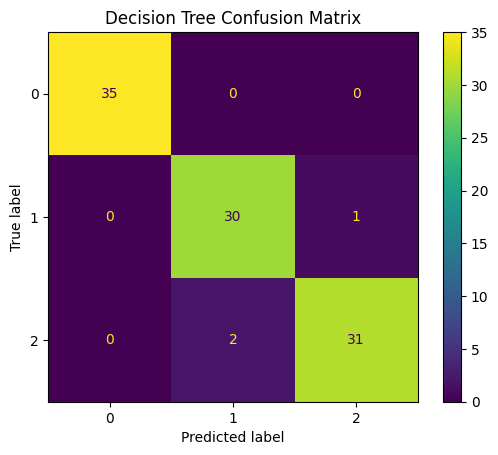

In [112]:
# plot confusion matrix for decision tree
dtree_cm = metrics.confusion_matrix(y_test, dtree_pred)
cm_display = metrics.ConfusionMatrixDisplay(dtree_cm).plot()
plt.title('Decision Tree Confusion Matrix')
plt.savefig("dtree_cm.png")

Classification Report for Logistic Regression Model
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.86      0.97      0.91        31
           2       0.97      0.94      0.95        33

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99

[0.9393939393939394, array([0.91428571, 0.96774194, 0.93939394]), array([1.        , 0.85714286, 0.96875   ])]


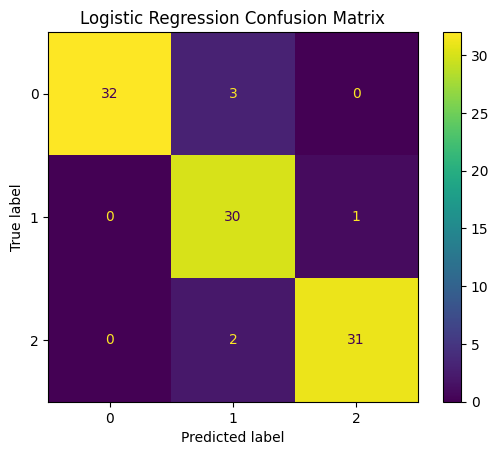

In [113]:
# create logistic regression model using same training and test datasets 
logR = linear_model.LogisticRegression(penalty=None).fit(x_train, y_train)

# Test model with testing dataset and find accuracy 
logR_pred = logR.predict(x_test)

# get classification report 
print(
    'Classification Report for Logistic Regression Model\n', 
    metrics.classification_report(y_test, logR_pred))

results['LogReg'] = [
        metrics.accuracy_score(y_test, logR_pred), 
        metrics.recall_score(y_test, logR_pred, average=None), 
        metrics.precision_score(y_test, logR_pred, average=None)
    ]

print(results['LogReg'])

# plot confusion matrix for logistic regression 
logR_cm = metrics.confusion_matrix(y_test, logR_pred)
cm_display = metrics.ConfusionMatrixDisplay(logR_cm).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.savefig("logR_cm.png")

Classification Report for KNN Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        31
           2       0.97      0.97      0.97        33

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

[0.9797979797979798, array([1.        , 0.96774194, 0.96969697]), array([1.        , 0.96774194, 0.96969697])]


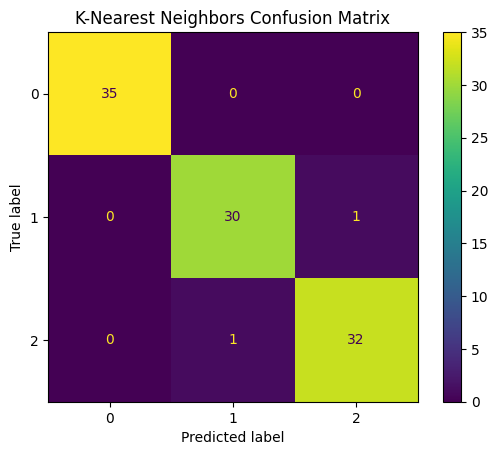

In [114]:
# create KNN model using same training and test datasets 
knn = neighbors.KNeighborsClassifier(
    n_neighbors=10,
    metric='euclidean').fit(x_train, y_train)

# Test model with testing dataset and find accuracy 
knn_pred = knn.predict(x_test)

# get classification report 
print(
    'Classification Report for KNN Model\n', 
    metrics.classification_report(y_test, knn_pred))

results['KNN'] = [
        metrics.accuracy_score(y_test, knn_pred), 
        metrics.recall_score(y_test, knn_pred, average=None), 
        metrics.precision_score(y_test, knn_pred, average=None)
    ]

print(results['KNN'])

# plot confusion matrix for logistic regression 
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(knn_cm).plot()
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.savefig("knn_cm.png")

In [115]:
def calculate_expected_profit(confusionMatrix, costBenefits):
    # calucate expected rates 
    expectedRates = confusionMatrix/confusionMatrix.sum()

    # multiply rates with costBenefits 
    expectedValues = expectedRates * costBenefits

    # return expected value 
    return expectedValues.sum()

In [116]:
costandbenefitsMatrix = -np.ones((3, 3))
# correct classifications = 1
for i in range(3):
    costandbenefitsMatrix[i][i] = 1
print('Cost and Benefits Matrix\n', costandbenefitsMatrix)

Cost and Benefits Matrix
 [[ 1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]]


In [117]:
profits = []
for cm in [dtree_cm, logR_cm, knn_cm]:
    profits.append(calculate_expected_profit(cm, costandbenefitsMatrix))

profits_df = pd.DataFrame(
    index=['Decision Tree', 'Logistic Regression', 'KNN']
)
profits_df['Expected Profit'] = profits
profits_df

,Expected Profit
Decision Tree,0.939394
Logistic Regression,0.878788
KNN,0.959596
